In [15]:
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [16]:
bac_dataset = pandas.read_csv("../data/raw/bac_dataset.csv")
bac_dataset

,ID_OSU,Gender_OSU,Weight_OSU,Beers,BAC,1st-Sobr,2nd-Sobr,ID_AUST,Gend_AUS,Wght_AUS,Height,Age,1hr-BAC,Wine
0,1,female,132,5,0.1,10,6,1,female,70,167,20,0.025,4
1,2,female,128,2,0.03,9.5,9.25,2,female,66,161,21,0.040,4
2,3,female,110,9,0.19,9.75,4.75,3,male,67,169,27,0.070,6
3,4,male,192,8,0.12,10,7.5,4,male,91,187,20,0.065,6
4,5,male,172,3,0.04,10,9.75,5,female,58,158,25,0.015,3
5,6,female,250,7,0.095,9.5,6.5,6,male,80,177,29,0.020,3
6,7,female,125,3,0.07,9.5,7,7,female,63,162,26,0.000,1
7,8,male,175,5,0.06,9.75,8.75,8,male,75,170,48,0.015,3
8,9,female,175,3,0.02,9.5,6,9,male,124,184,22,0.000,3
9,10,male,275,5,0.05,9.75,8.5,10,male,90,171,50,0.020,3


[Link (no longer works)](https://bcs.whfreeman.com/WebPub/Statistics/shared_resources/EESEE/BloodAlcoholContent/index.html)

**Ohio**
*   Subjects were student volunteers
*   BAC tested with breathalyzer 30 minutes after drinking complete
*   Beers were 12 oz
*   Sobriety test involved balancing on one foot, touching the tip of one’s nose with a forefinger, placing one’s head back with one’s eyes closed, and walking heel to toe; scored 1-10 (10 is perfect score)
*   Participants did not choose how much they drank
*   Weight in lb

**Australia**
*   10% alcohol/volume wine in 120 mL glasses
*   Subjects were volunteers, primarily students and university staff
*   Participants chose how much they drank
*   BAC tested with breathalyzer 1-hr after drinking started and 15 minutes after told to stop drinking
*   Weight in kg
*   Height in cm

In [17]:
bac_ohio_dataset = bac_dataset.loc[:,:'2nd-Sobr']
bac_ohio_dataset = bac_ohio_dataset.dropna()
bac_ohio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_OSU      16 non-null     object
 1   Gender_OSU  16 non-null     object
 2   Weight_OSU  16 non-null     object
 3   Beers       16 non-null     object
 4   BAC         16 non-null     object
 5   1st-Sobr    16 non-null     object
 6   2nd-Sobr    16 non-null     object
dtypes: object(7)
memory usage: 1.0+ KB


In [18]:
bac_ohio_dataset['ID_OSU'] = bac_ohio_dataset['ID_OSU'].astype(int)
bac_ohio_dataset['Weight_OSU'] = bac_ohio_dataset['Weight_OSU'].astype(int)
bac_ohio_dataset['Beers'] = bac_ohio_dataset['Beers'].astype(int)
bac_ohio_dataset['BAC'] = bac_ohio_dataset['BAC'].astype(float)
bac_ohio_dataset['1st-Sobr'] = bac_ohio_dataset['1st-Sobr'].astype(float)
bac_ohio_dataset['2nd-Sobr'] = bac_ohio_dataset['2nd-Sobr'].astype(float)
bac_ohio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID_OSU      16 non-null     int64  
 1   Gender_OSU  16 non-null     object 
 2   Weight_OSU  16 non-null     int64  
 3   Beers       16 non-null     int64  
 4   BAC         16 non-null     float64
 5   1st-Sobr    16 non-null     float64
 6   2nd-Sobr    16 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.0+ KB


In [19]:
bac_aust_dataset = bac_dataset.loc[:,'ID_AUST':]
bac_aust_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID_AUST   22 non-null     int64  
 1   Gend_AUS  22 non-null     object 
 2   Wght_AUS  22 non-null     int64  
 3   Height    22 non-null     int64  
 4   Age       22 non-null     int64  
 5   1hr-BAC   22 non-null     float64
 6   Wine      22 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.3+ KB


In [20]:
def create_graph(graphnumber, xlabel, ylabel, xvalue, yvalue, dataset):
  graphnumber.set_title(f"{xlabel} v. {ylabel}")
  graphnumber.set_xlabel(xlabel)
  graphnumber.set_ylabel(ylabel)
  graphnumber.scatter(dataset[xvalue], dataset[yvalue])

def regression_line(graphnumber, xvalue, yvalue, dataset):
  X = dataset[xvalue].values.reshape(-1, 1)
  model = LinearRegression()
  model.fit(X, dataset[yvalue])
  graphnumber.plot(X, model.predict(X))

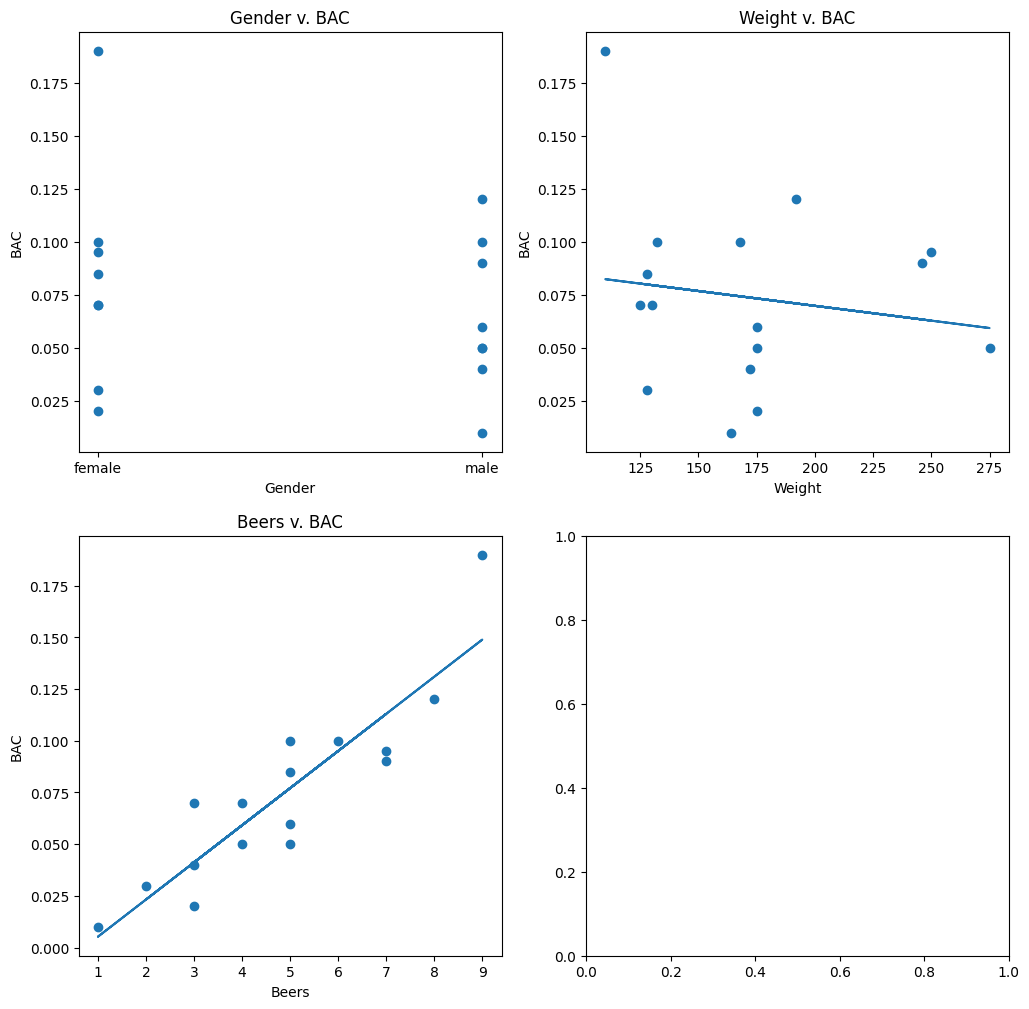

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))
create_graph(ax1, "Gender", "BAC", "Gender_OSU", "BAC", bac_ohio_dataset)
create_graph(ax2, "Weight", "BAC", "Weight_OSU", "BAC", bac_ohio_dataset)
regression_line(ax2, "Weight_OSU", "BAC", bac_ohio_dataset)
create_graph(ax3, "Beers", "BAC", "Beers", "BAC", bac_ohio_dataset)
regression_line(ax3, "Beers", "BAC", bac_ohio_dataset)

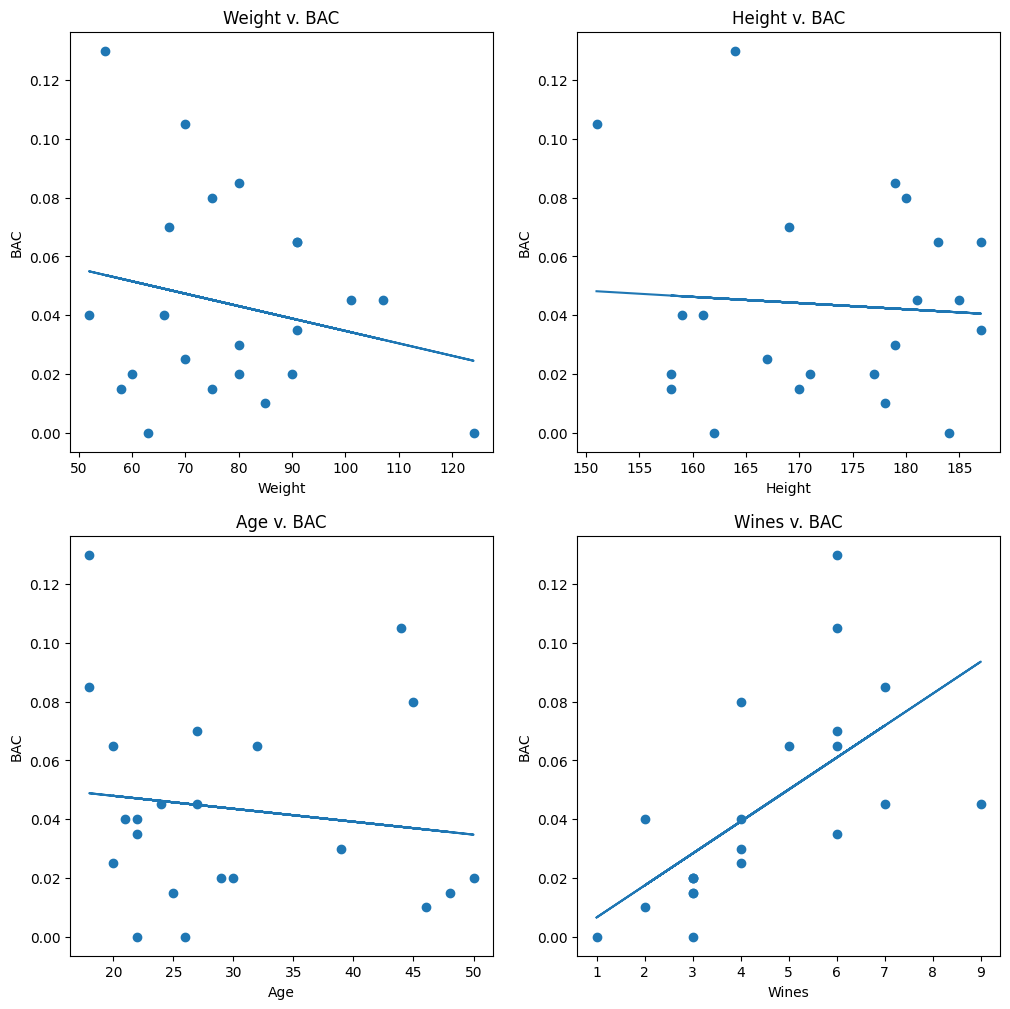

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 12))

create_graph(ax1, "Weight", "BAC", "Wght_AUS", "1hr-BAC", bac_aust_dataset)
regression_line(ax1, "Wght_AUS", "1hr-BAC", bac_aust_dataset)
create_graph(ax2, "Height", "BAC", "Height", "1hr-BAC", bac_aust_dataset)
regression_line(ax2, "Height", "1hr-BAC", bac_aust_dataset)
create_graph(ax3, "Age", "BAC", "Age", "1hr-BAC", bac_aust_dataset)
regression_line(ax3, "Age", "1hr-BAC", bac_aust_dataset)
create_graph(ax4, "Wines", "BAC", "Wine", "1hr-BAC", bac_aust_dataset)
regression_line(ax4, "Wine", "1hr-BAC", bac_aust_dataset)